In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data loading

In [167]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Data Processing

In [168]:
np.sum(df.isnull()) # check whether there are missing values in the dataset

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [169]:
df.dtypes # check data types

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [170]:
X = np.array(df.drop(['HeartDisease'], axis=1))
y = df['HeartDisease']
labels = df.columns

In [171]:
from sklearn.preprocessing import LabelEncoder

In [172]:
# convert catrgorical values to numerical values
labelEncoder = LabelEncoder()
X[:,1] = labelEncoder.fit_transform(X[:,1])
X[:,2] = labelEncoder.fit_transform(X[:,2])
X[:,6] = labelEncoder.fit_transform(X[:,6])
X[:,8] = labelEncoder.fit_transform(X[:,8])
X[:,10] = labelEncoder.fit_transform(X[:,10])
X

array([[40, 1, 1, ..., 0, 0.0, 2],
       [49, 0, 2, ..., 0, 1.0, 1],
       [37, 1, 1, ..., 0, 0.0, 2],
       ...,
       [57, 1, 0, ..., 1, 1.2, 1],
       [57, 0, 1, ..., 0, 0.0, 1],
       [38, 1, 2, ..., 0, 0.0, 2]], dtype=object)

# Data analysis

In [173]:
from sklearn.model_selection import train_test_split

In [174]:
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=0.3)

In [175]:
print("The number of positive examples in the training set =", np.sum(ytr==1))
print("The number of negative examples in the training set =", np.sum(ytr==0))
print("The number of positive examples in the testing set =", np.sum(yts==1))
print("The number of negative examples in the testing set =", np.sum(yts==0))

The number of positive examples in the training set = 352
The number of negative examples in the training set = 290
The number of positive examples in the testing set = 156
The number of negative examples in the testing set = 120


In [176]:
from pandas.core.frame import DataFrame
data = np.zeros((X.shape[0], X.shape[1]+1))
data[:,:-1] = X
data[:, -1] = y
df = DataFrame(data=data, columns=labels)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,1.0,1.0,140.0,289.0,0.0,1.0,172.0,0.0,0.0,2.0,0.0
1,49.0,0.0,2.0,160.0,180.0,0.0,1.0,156.0,0.0,1.0,1.0,1.0
2,37.0,1.0,1.0,130.0,283.0,0.0,2.0,98.0,0.0,0.0,2.0,0.0
3,48.0,0.0,0.0,138.0,214.0,0.0,1.0,108.0,1.0,1.5,1.0,1.0
4,54.0,1.0,2.0,150.0,195.0,0.0,1.0,122.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,1.0
914,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,1.0
915,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0
916,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0


In [177]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,0.781046,132.396514,198.799564,0.233115,0.989107,136.809368,0.404139,0.887364,1.361656,0.553377
std,9.432617,0.407701,0.956519,18.514154,109.384145,0.423046,0.631671,25.460334,0.490992,1.066570,0.607056,0.497414
min,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,0.000000,120.000000,173.250000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,0.000000,130.000000,223.000000,0.000000,1.000000,138.000000,0.000000,0.600000,1.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,1.000000


In [178]:
corr = df.corr()
corr

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Age,1.000000,0.055750,-0.077150,0.254399,-0.095282,0.198039,-0.007484,-0.382045,0.215793,0.258612,-0.268264,0.282039
Sex,0.055750,1.000000,-0.126559,0.005133,-0.200092,0.120076,0.071552,-0.189186,0.190664,0.105734,-0.150693,0.305445
ChestPainType,-0.077150,-0.126559,1.000000,-0.020647,0.067880,-0.073151,-0.072537,0.289123,-0.354727,-0.177377,0.213521,-0.386828
RestingBP,0.254399,0.005133,-0.020647,1.000000,0.100893,0.070193,0.022656,-0.112135,0.155101,0.164803,-0.075162,0.107589
Cholesterol,-0.095282,-0.200092,0.067880,0.100893,1.000000,-0.260974,-0.196544,0.235792,-0.034166,0.050148,0.111471,-0.232741
FastingBS,0.198039,0.120076,-0.073151,0.070193,-0.260974,1.000000,0.087050,-0.131438,0.060451,0.052698,-0.175774,0.267291
RestingECG,-0.007484,0.071552,-0.072537,0.022656,-0.196544,0.087050,1.000000,-0.179276,0.077500,-0.020438,-0.006778,0.057384
MaxHR,-0.382045,-0.189186,0.289123,-0.112135,0.235792,-0.131438,-0.179276,1.000000,-0.370425,-0.160691,0.343419,-0.400421
ExerciseAngina,0.215793,0.190664,-0.354727,0.155101,-0.034166,0.060451,0.077500,-0.370425,1.000000,0.408752,-0.428706,0.494282
Oldpeak,0.258612,0.105734,-0.177377,0.164803,0.050148,0.052698,-0.020438,-0.160691,0.408752,1.000000,-0.501921,0.403951


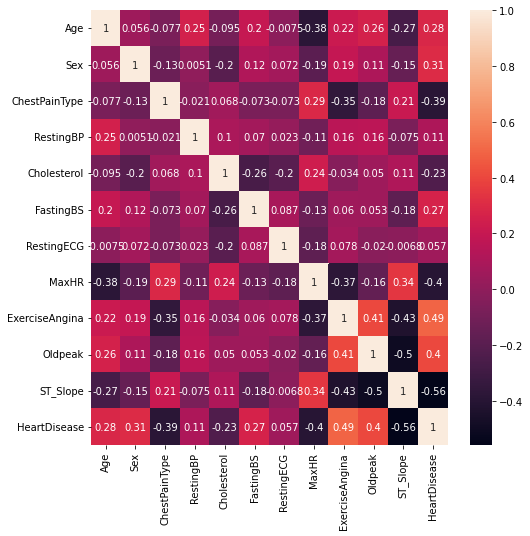

In [179]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr, annot=True)

# Logistic Regression

In [180]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [181]:
logr = LogisticRegression(solver="lbfgs", max_iter=1000)
logr.fit(Xtr, ytr)
yhat = logr.predict(Xts)

In [182]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [183]:
conf_mat = confusion_matrix(yts, yhat)
print(conf_mat)

[[106  14]
 [ 21 135]]


In [184]:
accuracy = accuracy_score(yts, yhat)
precision = precision_score(yts, yhat)
recall = recall_score(yts, yhat)
f1 = f1_score(yts, yhat)
print("The accuracy of the logistic model is:", accuracy)
print("The precision of the logistic model is:", precision)
print("The recall of the logistic model is:", recall)
print("The f1 score of the logistic model is:", f1)

The accuracy of the logistic model is: 0.8731884057971014
The precision of the logistic model is: 0.9060402684563759
The recall of the logistic model is: 0.8653846153846154
The f1 score of the logistic model is: 0.8852459016393444


[ 0.02383217  1.23383486 -0.70307009  0.00718326 -0.00372647  1.17662037
 -0.11178569 -0.00676771  1.0051272   0.30473904 -1.69653428]


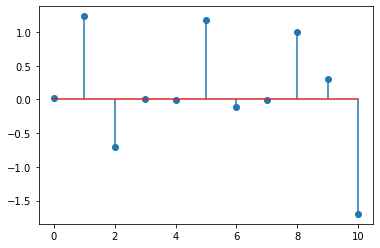

In [185]:
# feature importance visualization
W = logr.coef_
W = W.ravel()
print(W)
plt.stem(W, use_line_collection=True)
plt.show()

# Support Vector Machine

In [186]:
# support vector machine
from sklearn.svm import SVC

In [187]:
svc = SVC()
svc.fit(Xtr, ytr)
yhat = svc.predict(Xts)

In [188]:
conf_mat = confusion_matrix(yts, yhat)
print(conf_mat)

[[ 90  30]
 [ 39 117]]


In [189]:
accuracy = accuracy_score(yts, yhat)
precision = precision_score(yts, yhat)
recall = recall_score(yts, yhat)
f1 = f1_score(yts, yhat)
print("The accuracy of the support vector machine model is:", accuracy)
print("The precision of the support vector machine model is:", precision)
print("The recall of the support vector machine model is:", recall)
print("The f1 score of the support vector machine model is:", f1)

The accuracy of the support vector machine model is: 0.75
The precision of the support vector machine model is: 0.7959183673469388
The recall of the support vector machine model is: 0.75
The f1 score of the support vector machine model is: 0.7722772277227722


In [190]:
# SVM with parameter selection
C_test = [0.1, 1, 10]
gamma_test = [0.001, 0.01, 0.1]

nC = len(C_test)
ngam = len(gamma_test)
acc = np.zeros((nC, ngam))

for i in range(nC):
  for j in range(ngam):
    svc = SVC(C=C_test[i], kernel='rbf', gamma=gamma_test[j])
    svc.fit(Xtr, ytr)
    yhat = svc.predict(Xts)
    acc[i,j] = accuracy_score(yts, yhat)

print(acc)

[[0.75362319 0.56521739 0.56521739]
 [0.72826087 0.69565217 0.56521739]
 [0.74637681 0.67753623 0.57246377]]


In [191]:
idx = np.argmax(acc)
C = C_test[idx//3]
gamma = gamma_test[idx%3]

In [192]:
svc = SVC(C=C, kernel="rbf", gamma=gamma)
svc.fit(Xtr, ytr)
yhat = svc.predict(Xts)

conf_mat = confusion_matrix(yts, yhat)
print(conf_mat)

accuracy = accuracy_score(yts, yhat)
precision = precision_score(yts, yhat)
recall = recall_score(yts, yhat)
f1 = f1_score(yts, yhat)
print("The accuracy of the support vector machine model after parameter slection is:", accuracy)
print("The precision of the support vector machine model after parameter slection is:", precision)
print("The recall of the support vector machine model after parameter slection is:", recall)
print("The f1 score of the support vector machine model after parameter slection is:", f1)

[[ 75  45]
 [ 23 133]]
The accuracy of the support vector machine model after parameter slection is: 0.7536231884057971
The precision of the support vector machine model after parameter slection is: 0.7471910112359551
The recall of the support vector machine model after parameter slection is: 0.8525641025641025
The f1 score of the support vector machine model after parameter slection is: 0.7964071856287425


# Decision Tree

In [193]:
# decision tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [194]:
clf = DecisionTreeClassifier()
clf.fit(Xtr, ytr)
yhat = clf.predict(Xts)

In [195]:
conf_mat = confusion_matrix(yts, yhat)
print(conf_mat)

[[ 93  27]
 [ 34 122]]


In [196]:
accuracy = accuracy_score(yts, yhat)
precision = precision_score(yts, yhat)
recall = recall_score(yts, yhat)
f1 = f1_score(yts, yhat)
print("The accuracy of the decision tree model is:", accuracy)
print("The precision of the decision tree model is:", precision)
print("The recall of the decision tree model is:", recall)
print("The f1 score of the decision tree model is:", f1)

The accuracy of the decision tree model is: 0.7789855072463768
The precision of the decision tree model is: 0.8187919463087249
The recall of the decision tree model is: 0.782051282051282
The f1 score of the decision tree model is: 0.7999999999999999


In [197]:
# decision tree with reduced max_depth
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(Xtr, ytr)
yhat = clf.predict(Xts)

In [198]:
conf_mat = confusion_matrix(yts, yhat)
print(conf_mat)

[[100  20]
 [ 30 126]]


In [199]:
accuracy = accuracy_score(yts, yhat)
precision = precision_score(yts, yhat)
recall = recall_score(yts, yhat)
f1 = f1_score(yts, yhat)
print("The accuracy of the decision tree model is:", accuracy)
print("The precision of the decision tree model is:", precision)
print("The recall of the decision tree model is:", recall)
print("The f1 score of the decision tree model is:", f1)

The accuracy of the decision tree model is: 0.8188405797101449
The precision of the decision tree model is: 0.863013698630137
The recall of the decision tree model is: 0.8076923076923077
The f1 score of the decision tree model is: 0.8344370860927152


[Text(167.4, 181.2, 'X[10] <= 1.5\ngini = 0.495\nsamples = 642\nvalue = [290, 352]'),
 Text(83.7, 108.72, 'X[1] <= 0.5\ngini = 0.312\nsamples = 377\nvalue = [73, 304]'),
 Text(41.85, 36.23999999999998, 'gini = 0.5\nsamples = 61\nvalue = [30, 31]'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.235\nsamples = 316\nvalue = [43, 273]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 0.5\ngini = 0.297\nsamples = 265\nvalue = [217, 48]'),
 Text(209.25, 36.23999999999998, 'gini = 0.494\nsamples = 90\nvalue = [50, 40]'),
 Text(292.95, 36.23999999999998, 'gini = 0.087\nsamples = 175\nvalue = [167, 8]')]

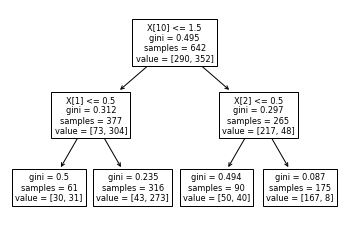

In [200]:
plot_tree(clf)

# Neural Network

In [201]:
# nerual network
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.backend as K
from keras.models import Sequential

In [202]:
K.clear_session()

In [203]:
nh = 256
num_in = X.shape[1]
num_out = np.unique(y).shape[0]
model = Sequential()
model.add(Dense(nh, input_shape=(num_in,), activation='sigmoid', name='hidden'))
model.add(Dense(num_out, activation='softmax', name='output'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 256)               3072      
                                                                 
 output (Dense)              (None, 2)                 514       
                                                                 
Total params: 3,586
Trainable params: 3,586
Non-trainable params: 0
_________________________________________________________________


In [204]:
from keras import optimizers
opt = tf.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics='accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [205]:
Xtr = np.asarray(Xtr).astype('float64')
Xts = np.asarray(Xts).astype('float64')
ytr = np.asarray(ytr).astype('float64')
yts = np.asarray(yts).astype('float64')
hist = model.fit(Xtr, ytr, batch_size=100, epochs=10, validation_data=(Xts, yts))

Epoch 1/10
7/7 [==============================] - 1s 118ms/step - loss: 0.7719 - accuracy: 0.4735 - val_loss: 0.6611 - val_accuracy: 0.5652
Epoch 2/10
7/7 [==============================] - 0s 7ms/step - loss: 0.6335 - accuracy: 0.6106 - val_loss: 0.5739 - val_accuracy: 0.6993
Epoch 3/10
7/7 [==============================] - 0s 7ms/step - loss: 0.5945 - accuracy: 0.6636 - val_loss: 0.5565 - val_accuracy: 0.7319
Epoch 4/10
7/7 [==============================] - 0s 11ms/step - loss: 0.5684 - accuracy: 0.7040 - val_loss: 0.5460 - val_accuracy: 0.7645
Epoch 5/10
7/7 [==============================] - 0s 8ms/step - loss: 0.5577 - accuracy: 0.7165 - val_loss: 0.5371 - val_accuracy: 0.7391
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.5511 - accuracy: 0.7181 - val_loss: 0.5291 - val_accuracy: 0.7717
Epoch 7/10
7/7 [==============================] - 0s 7ms/step - loss: 0.5452 - accuracy: 0.7305 - val_loss: 0.5291 - val_accuracy: 0.7609
Epoch 8/10
7/7 [===============

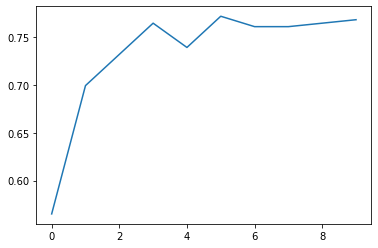

In [206]:
plt.plot(hist.history['val_accuracy'])
plt.show()

In [207]:
yhat = model.predict(Xts)
yhat = np.argmax(yhat, axis=1)

In [208]:
conf_mat = confusion_matrix(yts, yhat)
print(conf_mat)

[[ 90  30]
 [ 34 122]]


In [209]:
print("The accuracy of the nerual network model is:", accuracy)
print("The precision of the nerual network model is:", precision)
print("The recall of the nerual network model is:", recall)
print("The f1 score of the nerual network model is:", f1)

The accuracy of the nerual network model is: 0.8188405797101449
The precision of the nerual network model is: 0.863013698630137
The recall of the nerual network model is: 0.8076923076923077
The f1 score of the nerual network model is: 0.8344370860927152
